In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/Shareddrives/데이터 청년 캠퍼스/DB/data.xlsx'

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_excel(path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9474 entries, 0 to 9473
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_0     9474 non-null   float64
 1   y_0     9474 non-null   float64
 2   z_0     9474 non-null   float64
 3   x_1     9474 non-null   float64
 4   y_1     9474 non-null   float64
 5   z_1     9474 non-null   float64
 6   x_2     9474 non-null   float64
 7   y_2     9474 non-null   float64
 8   z_2     9474 non-null   float64
 9   x_3     9474 non-null   float64
 10  y_3     9474 non-null   float64
 11  z_3     9474 non-null   float64
 12  x_4     9474 non-null   float64
 13  y_4     9474 non-null   float64
 14  z_4     9474 non-null   float64
 15  x_5     9474 non-null   float64
 16  y_5     9474 non-null   float64
 17  z_5     9474 non-null   float64
 18  x_6     9474 non-null   float64
 19  y_6     9474 non-null   float64
 20  z_6     9474 non-null   float64
 21  x_7     9474 non-null   float64
 22  

In [ ]:
#X = data.drop(['z_0','z_1','z_2','z_3','z_4','z_5','z_6','z_7','z_8','z_9','z_10','z_11','z_12','z_13','z_14','z_15','z_16','y','image'], axis = 1)
X = data.drop(['x_0','y_0','z_0','x_1','y_1','z_1','x_5','y_5','z_5','x_9','y_9','z_9','x_13','y_13','z_13','y','image'], axis = 1)
#X = data.drop(['y','image'], axis = 1)

In [ ]:
y = data["y"]

#데이터 정규화

##손바닥 - 엄지손가락 vector을 통해 이미지 같은 방향으로 맞춘다

##엄지 손가락 기준으로 손크기 맞춘다

#모델

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import norm, boxcox
from scipy import stats
from collections import Counter
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False, random_state=1004)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def metrics(y_true, y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))

def predictions(model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
      model.fit(X_train, y_train)
      #predictions
      train_pred = model.predict(X_train)
      test_pred = model.predict(X_test)
      actual = [y_train, y_test]
      pred = [train_pred, test_pred]
      for i in range(0,2):
          if i==0:
              print('----Train Metrics----')
          else:
              print('----Test Metrics----')
          metrics(actual[i], pred[i])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
predictions(dt)
dt.feature_importances_

----Train Metrics----
Confusion Matrix:
 [[4774    0]
 [   0 1857]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1857

    accuracy                           1.00      6631
   macro avg       1.00      1.00      1.00      6631
weighted avg       1.00      1.00      1.00      6631

----Test Metrics----
Confusion Matrix:
 [[   0    0]
 [1741 1102]]


Accuracy Score:
 0.38761871262750613


Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.39      0.56      2843

    accuracy                           0.39      2843
   macro avg       0.50      0.19      0.28      2843
weighted avg       1.00      0.39      0.56      2843



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([0.02439157, 0.04817045, 0.04750987, 0.02535626, 0.03164238,
       0.01668014, 0.02348349, 0.0319599 , 0.04918858, 0.01211779,
       0.00707008, 0.03919895, 0.00721243, 0.00641028, 0.01198747,
       0.02140213, 0.01913978, 0.00653817, 0.0156457 , 0.01165262,
       0.01719422, 0.00417244, 0.03805031, 0.02712182, 0.02578131,
       0.05432511, 0.01450755, 0.04860601, 0.18762857, 0.01406398,
       0.0081561 , 0.01165714, 0.01049304, 0.0405004 , 0.02449375,
       0.0164902 ])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
predictions(knn)

----Train Metrics----
Confusion Matrix:
 [[4774    0]
 [   0 1857]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4774
           1       1.00      1.00      1.00      1857

    accuracy                           1.00      6631
   macro avg       1.00      1.00      1.00      6631
weighted avg       1.00      1.00      1.00      6631

----Test Metrics----
Confusion Matrix:
 [[   0    0]
 [1708 1135]]


Accuracy Score:
 0.39922616953921913


Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.40      0.57      2843

    accuracy                           0.40      2843
   macro avg       0.50      0.20      0.29      2843
weighted avg       1.00      0.40      0.57      2843



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


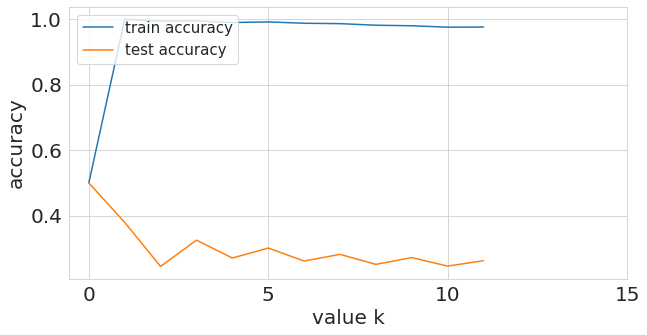

In [ ]:
import matplotlib
matplotlib.rc("xtick", labelsize=20)
matplotlib.rc("ytick", labelsize=20)

train_accuracies = [0.5]
test_accuracies = [0.5]

for k in range(1, 12):
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Train model
    clf.fit(X_train, y_train)
    # Create train and test predictions
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    # Append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
# Create plots
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={"size" : 15})
plt.xticks(range(0, 16, 5))
plt.xlabel("value k", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

#MLP

In [ ]:
print("shape of X: {}\nshape of y: {}".format(X.shape,y.shape))

shape of X: (9474, 51)
shape of y: (9474,)


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]
 
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]
  def __len__(self):
    return self.length

trainset = dataset(X,y)
#DataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

ValueError: ignored

In [ ]:
#defining the network
from torch import nn
from torch.nn import functional as F
class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,32)
    self.fc2 = nn.Linear(32,64)
    self.fc3 = nn.Linear(64,1)
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

In [ ]:
#hyper parameters
learning_rate = 0.01
epochs = 700
# Model , Optimizer, Loss
model = Net(input_shape=x.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

In [ ]:
#forward loop
losses = []
accur = []
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainloader):
    
    #calculate output
    output = model(x_train)
 
    #calculate loss
    loss = loss_fn(output,y_train.reshape(-1,1))
 
    #accuracy
    predicted = model(torch.tensor(x,dtype=torch.float32))
    acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if i%50 == 0:
    losses.append(loss)
    accur.append(acc)
    print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

In [ ]:
#plotting the loss
plt.plot(losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')

In [ ]:
#printing the accuracy
plt.plot(accur)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')